In [2]:
import tf_deepRL as drl
from tf_deepRL.env import load_env
from tf_deepRL.agents.policy_gradient import VPG
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
env = load_env(provider="OpenAI-gym", name="CartPole-v0", virtual_display=True)

In [4]:
def cartpole_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=64, activation='relu'),
      tf.keras.layers.Dense(units=32, activation='relu'),
      tf.keras.layers.Dense(env.action_space, activation=None)
    ])
    return model

model = cartpole_model()

In [5]:
agent = VPG(model, env)

In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
history = agent.train(opt, episodes=700, status_type="text", status_interval=100)

Episode: 100/700
[===========================] - 0s 212ms/episode - rewards: 29.68
Episode: 200/700
[===========================] - 0s 334ms/episode - rewards: 52.35
Episode: 300/700
[===========================] - 0s 451ms/episode - rewards: 87.14
Episode: 400/700
[===========================] - 0s 470ms/episode - rewards: 90.58
Episode: 500/700
[===========================] - 0s 665ms/episode - rewards: 126.86
Episode: 600/700
[===========================] - 0s 632ms/episode - rewards: 113.87
Episode: 700/700
[===========================] - 0s 740ms/episode - rewards: 200.0


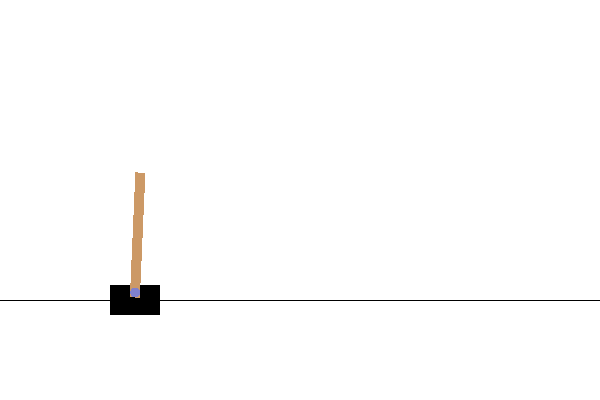

True

In [9]:
agent.play(max_steps=100, stop_when_finish=False)